Bernstein–Vazirani algorithm to determine hidden string

In [10]:
from qiskit import *
from qiskit_aer import AerSimulator

secretnumber = '01010111'

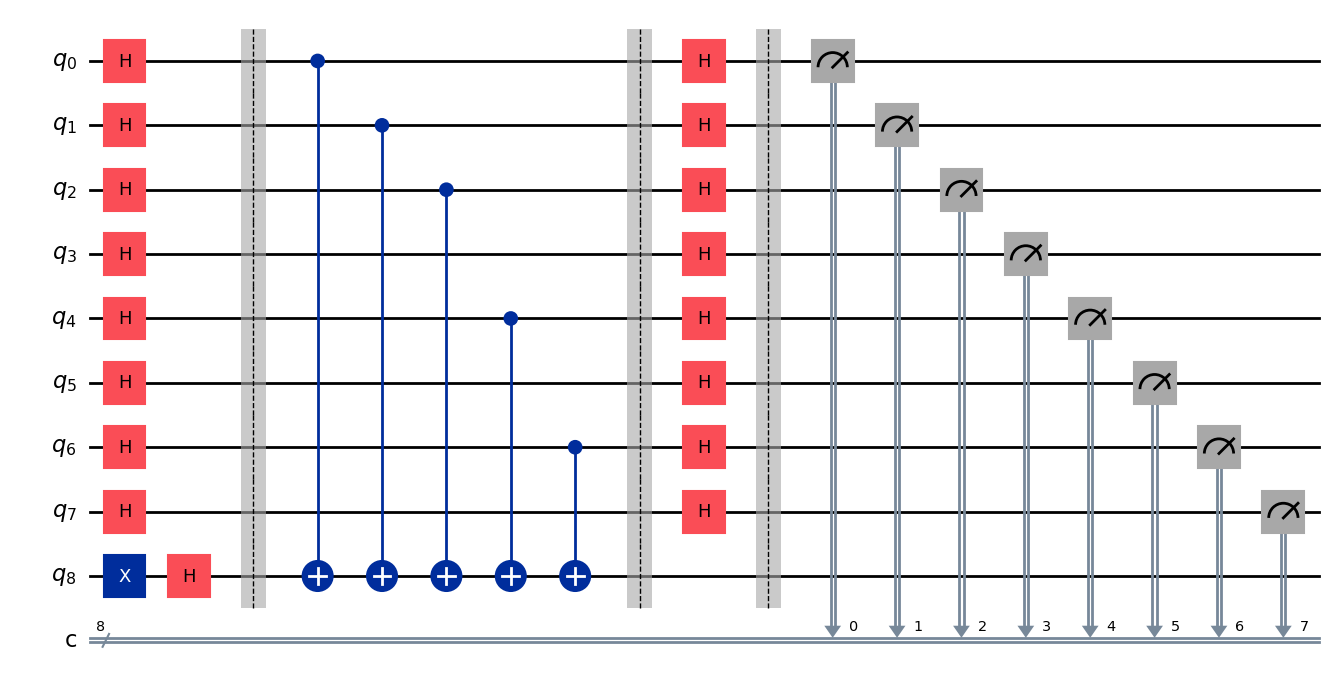

In [11]:
if (len(secretnumber) > 28):
        print("Max amount of bits reached (29)")

circuit = QuantumCircuit(len(secretnumber) + 1, len(secretnumber))

circuit.h(range(len(secretnumber))) # Hadamard gates
circuit.x(len(secretnumber)) # X-gate on last bit
circuit.h(len(secretnumber))

circuit.barrier()

for i, item in enumerate(reversed(secretnumber)):  # X-gate if '1'
        if item == '1':
                circuit.cx(i, len(secretnumber))

circuit.barrier()
circuit.h(range(len(secretnumber)))  # Hadamard gates
circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

circuit.draw(output="mpl")

In [12]:
# Simulate and print results
simulator = AerSimulator()
job = simulator.run(circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("hidden string and counts")
print(counts)

hidden string and counts
{'01010111': 1000}
